# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_name = []
lat = []
lng = []
max_temp = []
country = []
date = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"The temperature information for {city} received is: {max_temp}")
        print(f"The humidity information for {city} received is: {humidity}")
        print(f"The cloudiness information for {city} received is: {cloudiness}")
        print(f"The wind speed information for {city} received is: {windspeed}")
        print(f"The lat information for {city} received is: {lat}")
        print(f"The lng information for {city} receiveed is: {lng}")
    except:
        print('No city data found')
    continue
    
    
    
    



The temperature information for arraial do cabo received is: [20.56]
The humidity information for arraial do cabo received is: [74]
The cloudiness information for arraial do cabo received is: [0]
The wind speed information for arraial do cabo received is: [6.85]
The lat information for arraial do cabo received is: [-22.97]
The lng information for arraial do cabo receiveed is: [-42.03]
The temperature information for sembe received is: [20.56, 20.37]
The humidity information for sembe received is: [74, 89]
The cloudiness information for sembe received is: [0, 93]
The wind speed information for sembe received is: [6.85, 2.18]
The lat information for sembe received is: [-22.97, 1.65]
The lng information for sembe receiveed is: [-42.03, 14.58]
The temperature information for los llanos de aridane received is: [20.56, 20.37, 23]
The humidity information for los llanos de aridane received is: [74, 89, 73]
The cloudiness information for los llanos de aridane received is: [0, 93, 90]
The wind 

The temperature information for kavieng received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74]
The humidity information for kavieng received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73]
The cloudiness information for kavieng received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70]
The wind speed information for kavieng received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9]
The lat information for kavieng received is: [-22.97, 1.65, 28.66, -33.93, -34.42, 51, 9.53, 41.36, 66.77, 64.38, 22.08, -15.77, -10.45, -46.28, -9.8, -2.57]
The lng information for kavieng receiveed is: [-42.03, 14.58, -17.92, 18.42, 19.23, 32, 31.66, -72.1, 123.37, -173.3, 82.15, 128.73, 161.92, 169.85, -139.03, 150.8]
The temperature information for albany received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11]
The

The temperature information for rikitea received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28]
The humidity information for rikitea received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79]
The cloudiness information for rikitea received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36]
The wind speed information for rikitea received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9, 1.73, 5.1, 2.6, 4.1, 6.2, 3.99, 2.6, 0.89, 5.22]
The lat information for rikitea received is: [-22.97, 1.65, 28.66, -33.93, -34.42, 51, 9.53, 41.36, 66.77, 64.38, 22.08, -15.77, -10.45, -46.28, -9.8, -2.57, 42.6, -54.8, 25.76, 70.37, 22.08, 54.11, 16.07, -34, -23.12]
The lng information for rikitea receiveed is: [-42.03, 14.58, -17.92, 18.42, 19.23, 32, 31.

No city data found
The temperature information for saint-pierre received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11]
The humidity information for saint-pierre received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64]
The cloudiness information for saint-pierre received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90]
The wind speed information for saint-pierre received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9, 1.73, 5.1, 2.6, 4.1, 6.2, 3.99, 2.6, 0.89, 5.22, 2.1, 4.6, 2.91, 2.6, 1.09, 4.6, 3.1]
The lat information for saint-pierre received is: [-22.97, 1.65, 28.66, -33.93, -34.42, 51, 9.53, 41.36, 66.77, 64.38, 22.08, -15.77, -10.45, -

The temperature information for bambous virieux received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22]
The humidity information for bambous virieux received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56]
The cloudiness information for bambous virieux received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75]
The wind speed information for bambous virieux received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9, 1.73, 5.1, 2.6, 4.1, 6.2, 3.99, 2.6, 0.89, 5.22, 2.1, 4.6, 2.91, 2.6, 1.09, 4.6, 3.1, 1.79, 1.19, 0.89, 8.2, 1.77, 4.6]
The lat information for bam

The temperature information for necochea received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10]
The humidity information for necochea received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86]
The cloudiness information for necochea received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67]
The wind speed information for necochea received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9, 1.73, 5.1, 2.6, 4.1, 6.2, 3.99, 2.6, 0.89, 5.22, 2.1, 4.6, 2.91, 2.6, 1.09, 4.6, 3.1, 1.79, 1.19, 0.89, 8.2,

The temperature information for dikson received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08]
The humidity information for dikson received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95]
The cloudiness information for dikson received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67, 20, 0, 100, 0, 100]
The wind speed information for dikson received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32, 4.1, 6.57, 1.72, 8.83, 6.9, 1.73, 5.1, 2.6, 4.1, 6.2, 3.99, 2.6, 0.89, 5.22, 

The temperature information for busselton received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11]
The humidity information for busselton received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44]
The cloudiness information for busselton received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67, 20, 0, 100, 0, 100, 75, 20, 93, 100, 5]
The wind speed information for busselton received is: [6.85, 2.18, 4.6, 2.1, 0.45, 1.55, 1.33, 3.1, 0.69, 5, 2.32,

The temperature information for hilo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27]
The humidity information for hilo received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69]
The cloudiness information for hilo received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67, 20, 0, 100, 0, 100, 75, 20, 93, 100, 5, 100, 67, 75, 90]
The wind speed information for hilo received is: [6.85, 2.18, 4.6, 2.1, 0.45

The temperature information for constitucion received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82]
The humidity information for constitucion received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65]
The cloudiness information for constitucion received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67, 20, 0, 100, 0, 100, 75, 20, 93, 100, 5, 100, 67, 75, 90, 44, 90, 1

The temperature information for qaanaaq received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03]
The humidity information for qaanaaq received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85]
The cloudiness information for qaanaaq received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67, 20, 0, 100, 0, 100, 75, 20, 93, 100, 5, 

The temperature information for gumdag received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33]
The humidity information for gumdag received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23]
The cloudiness information for gumdag received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90, 90, 97, 100, 83, 75, 100, 75, 2, 97, 0, 90, 67,

The temperature information for bembereke received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99]
The humidity information for bembereke received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84]
The cloudiness information for bembereke received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 21, 36, 40, 75, 75, 75, 100, 90

The temperature information for victoria received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78]
The humidity information for victoria received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59]
The cloudiness information for victoria received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89, 100, 6, 70, 7, 40, 75, 75, 90, 95, 20, 2

The temperature information for port elizabeth received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10]
The humidity information for port elizabeth received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93]
The cloudiness information for port elizabeth received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75, 89,

The temperature information for barrow received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9]
The humidity information for barrow received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42, 70]
The cloudiness information for barrow received is: [0, 93, 90, 75, 48, 14, 99, 1, 87, 75, 100, 75

The temperature information for punta arenas received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2]
The humidity information for punta arenas received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42, 70, 93, 91, 80]
The cloudiness information for punta arenas received is: [0,

The temperature information for livingstonia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39]
The humidity information for livingstonia received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42, 70, 93, 91, 80, 100, 58, 70]
The cloudiness information

The temperature information for puerto carreno received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46]
The humidity information for puerto carreno received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42, 70, 93, 91, 80, 100, 58, 70, 82

The temperature information for vao received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07]
The humidity information for vao received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42, 70, 93, 91, 80, 100, 58, 70, 82, 49, 83

No city data found
The temperature information for carutapera received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87]
The humidity information for carutapera received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93,

The temperature information for bontang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75]
The humidity information for bontang received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 74, 74, 59, 63, 75, 93, 76, 42

The temperature information for port lincoln received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08]
The humidity information for port lincoln received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23, 83, 67, 70, 84, 

The temperature information for quatre cocos received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67]
The humidity information for quatre cocos received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 54, 23

The temperature information for dobris received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89]
The humidity information for dobris received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81, 85, 93, 70, 

The temperature information for kathu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29]
The humidity information for kathu received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 64, 78, 65, 87, 74, 81,

The temperature information for santa luzia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15]
The humidity information for santa luzia received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 56, 69, 32, 

The temperature information for nikolskoye received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22]
The humidity information for nikolskoye received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100, 93, 

The temperature information for taperoa received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93]
The humidity information for taperoa received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50, 72, 44, 100,

The temperature information for namatanai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5]
The humidity information for namatanai received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71, 95, 72, 88, 50

The temperature information for mount gambier received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12]
The humidity information for mount gambier received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 71

The temperature information for shimoda received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56]
The humidity information for shimoda received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89, 40, 65, 86, 77, 94, 89, 

No city data found
No city data found
The temperature information for new norfolk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11]
The humidity information for new norfolk received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 

The temperature information for karratha received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7]
The humidity information for karratha received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 77, 97, 51, 88, 56, 88, 89

The temperature information for petropavlovsk-kamchatskiy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17]
The humidity information for petropavlovsk-kamchatskiy received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 8

The temperature information for kuandian received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66]
The humidity information for kuandian received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81, 87, 64, 83, 7

The temperature information for marienburg received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33]
The humidity information for marienburg received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 81, 81

The temperature information for tautira received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26]
The humidity information for tautira received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 56, 68, 8

The temperature information for bereda received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67]
The humidity information for bereda received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 66, 83, 79, 60, 

The temperature information for ilulissat received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4]
The humidity information for ilulissat received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 89, 6

The temperature information for laguna received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22]
The humidity information for laguna received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18, 80, 79, 76, 73, 71, 74, 100, 87, 83, 

No city data found
The temperature information for severo-yeniseyskiy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25]
The humidity information for severo-yeniseyskiy received is: [74, 89, 73, 93, 95, 67, 90, 

The temperature information for trincomalee received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21]
The humidity information for trincomalee received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18,

The temperature information for sorland received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13]
The humidity information for sorland received is: [74, 89, 73, 93, 95, 67, 90, 88, 35, 71, 84, 18,

The temperature information for novaya bryan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19]
The humidity information for novaya bryan received is: [74, 89, 73, 93, 95, 67, 90

The temperature information for hobart received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11]
The humidity information for hobart received is: [74, 89, 73, 93, 95, 67, 

The temperature information for richards bay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1]
The humidity information for richards bay received is: 

The temperature information for zyryanovsk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99]
The humidity information for zyryanovsk receiv

The temperature information for san patricio received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24]
The humidity information for san 

The temperature information for grand-bourg received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26]
The humidity informatio

The temperature information for assiniboia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17]
The humidity 

The temperature information for aklavik received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12]
The humi

The temperature information for chilmari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for esmeraldas received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for tocopilla received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for nokaneng received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for wonthaggi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for tezu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for nemuro received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
No city data found
The temperature information for alofi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21

The temperature information for charters towers received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 

The temperature information for merauke received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for luderitz received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for avera received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for katsuura received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for rajula received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for griffith received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

The temperature information for peace river received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for flagstaff received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for zalantun received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for lompoc received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for bandarbeyla received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for aden received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for tadine received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for baglan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for mananjary received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for stromness received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for marsabit received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for oildale received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for mkushi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for salta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for srandakan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for sola received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for gopalpur received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for aykhal received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for luleburgaz received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for port blair received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for te anau received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for ventspils received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for touros received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for tigil received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for sabzevar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for fortuna received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for udachnyy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for bilibino received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ati received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 14

The temperature information for kumo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

No city data found
The temperature information for havelock received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

No city data found
The temperature information for bousso received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17

The temperature information for ajdabiya received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for korla received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for zheleznodorozhnyy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12

The temperature information for maple creek received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

No city data found
The temperature information for sitka received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17,

No city data found
The temperature information for simpang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for atikokan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for gorno-altaysk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for rumphi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for saskylakh received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for karimnagar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for salalah received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for la sarre received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for airai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

No city data found
The temperature information for ambunti received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for nanakuli received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for zhezkazgan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for denpasar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for faanui received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for rio grande received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for chama received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for staryy saltiv received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for port hardy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for altay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for krasnyy chikoy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2

The temperature information for kieta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for labrea received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for kinablangan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for bonfim received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for byron bay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for la rioja received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for huanren received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for sao paulo de olivenca received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23

The temperature information for ahipara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for margate received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for winnemucca received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for harper received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for elk city received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for nha trang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

No city data found
The temperature information for sur received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 2

The temperature information for sibolga received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for valparaiso received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for husavik received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for mehamn received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for cidreira received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

The temperature information for sulangan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for mustasaari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for gualan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for sept-iles received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for kulhudhuffushi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2

The temperature information for sao filipe received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for honiara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for mae hong son received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for ishigaki received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for totskoye received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for shingu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for acapulco received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for san cristobal received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for zhangjiakou received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for buzmeyin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for severo-kurilsk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2

The temperature information for praia da vitoria received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12,

The temperature information for buin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for kralendijk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for mananara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ayacucho received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for capao bonito received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for charleville-mezieres received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23,

The temperature information for galveston received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for praya received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for qaqortoq received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for roma received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for leningradskiy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for kabul received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for chepareria received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for lugovskoy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for ancud received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for sorong received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for mount isa received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for nefteyugansk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for tutoia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for comodoro rivadavia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 1

The temperature information for inhambane received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for sinjar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for naustdal received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for marawi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for sinnamary received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for port hawkesbury received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 

No city data found
No city data found
The temperature information for saint-augustin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 

The temperature information for babayurt received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for tuensang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for kaeo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

No city data found
The temperature information for upernavik received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20

The temperature information for aktau received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for flin flon received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for rochegda received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for bay roberts received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

No city data found
The temperature information for buraydah received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

The temperature information for san quintin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for siyabuswa received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for sigli received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for guarapari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for beyneu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for dingle received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for broome received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for kemin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for saint anthony received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for bubaque received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for salinas received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for caraz received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for padang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for ballina received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for asfi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for burnie received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for caluquembe received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 2

The temperature information for iwanai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for esperance received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

No city data found
The temperature information for mana received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 

The temperature information for cururupu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ugoofaaru received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for kalach-na-donu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2

No city data found
No city data found
The temperature information for ferrol received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 2

The temperature information for biak received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for kuytun received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for wanlaweyn received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for dryden received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for klerksdorp received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for bani walid received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for blytheville received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for khandbari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for olafsvik received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for mazagao received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for sobolevo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

No city data found
The temperature information for papetoai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

The temperature information for santa lucia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for marsta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for noboribetsu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for larsnes received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for muros received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for tagusao received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for sumbe received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for sabang received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for san roque received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for kodinsk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for orangeburg received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for coahuayana received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for sawtell received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for nacala received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for lerwick received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for rawson received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for kenai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

No city data found
The temperature information for bunia received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17,

The temperature information for kutum received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for bafoulabe received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for volosovo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for portland received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for truth or consequences received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23

The temperature information for teya received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for saint-francois received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2

The temperature information for vila franca do campo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23,

The temperature information for bayan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for chingola received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for bela received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for paka received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

No city data found
The temperature information for xai-xai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for chabahar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ginda received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for pevek received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for kibala received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for ponta do sol received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for strand received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for cranbourne received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for moerai received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for taoudenni received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for mopipi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for mandera received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for ostrovnoy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for hualmay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for chilliwack received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for flinders received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for sangar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for usakos received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for dhandhuka received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for frontera received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for atar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for pietarsaari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for lavrentiya received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for la tebaida received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for san carlos de bariloche received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 

The temperature information for sao joao da barra received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12

The temperature information for pacific grove received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for iskateley received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for grindavik received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for oshakati received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ukiah received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for saint-leu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for yarmouth received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for pangnirtung received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for leshukonskoye received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for arkhara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for bratsk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for saint-joseph received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for askino received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for belmopan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for skelleftea received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for guajara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for kahului received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for tromso received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for bitkine received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for bud received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 14

The temperature information for san matias received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for cortez received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for okhotsk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for guasdualito received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for sampit received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for campo maior received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 

No city data found
The temperature information for port augusta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28,

The temperature information for finschhafen received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for moshupa received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for storforshei received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for altamira received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for djambala received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for mancio lima received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for pontes e lacerda received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12,

The temperature information for komsomolskiy received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for nome received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for camacari received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for trairi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for half moon bay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

The temperature information for mecca received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for ketchikan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for villa carlos paz received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12,

The temperature information for vanimo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for znamenskoye received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

No city data found
The temperature information for bonnyville received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 2

The temperature information for kansanshi received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for banjar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for erdenet received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for amli received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for tuatapere received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for piuma received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for havre-saint-pierre received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 1

The temperature information for nkowakowa received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for antofagasta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for huarmey received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for college received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for cefalu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for astana received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for celestun received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for port stanley received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for mazatan received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for cravo norte received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for hammerfest received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for kizukuri received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for gizo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for pisco received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for pochutla received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for argir received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for nowe miasto lubawskie received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23

The temperature information for codrington received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for savelugu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for aginskoye received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for keti bandar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

No city data found
The temperature information for springbok received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20

The temperature information for bandundu received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for westport received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for egvekinot received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for bilma received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for sydney received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for port-cartier received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 

The temperature information for gloucester received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for broken hill received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for niort received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for lusambo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for vilhena received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

No city data found
The temperature information for scarborough received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 

The temperature information for nuuk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for kalabo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for bowen received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

The temperature information for abha received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for falmouth received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for dauphin received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for riyadh received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for zyryanka received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for kimbe received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 

No city data found
The temperature information for mercedes received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.

The temperature information for barreirinha received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for jijiga received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

No city data found
The temperature information for ramsar received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17

The temperature information for buta received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

No city data found
The temperature information for safford received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for mwinilunga received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for quzhou received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for bara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for mala received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54, 1

The temperature information for thunder bay received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 2

The temperature information for baraboo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for carinhanha received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for mayor pablo lagerenza received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23

No city data found
The temperature information for aloleng received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.1

The temperature information for anadyr received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

The temperature information for nam som received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for kirensk received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54

The temperature information for namyslow received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for santa barbara received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2,

No city data found
The temperature information for pafos received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17,

No city data found
The temperature information for buala received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17,

The temperature information for askarovo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.5

The temperature information for ankazoabo received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.

The temperature information for baruun-urt received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27

The temperature information for tiarei received is: [20.56, 20.37, 23, 10, 4.44, 20.64, 21.08, 23, 24.25, 11, 25.96, 30, 28.05, 9.44, 26.3, 29.74, 16.11, 3, 25.56, 11, 26, 20.84, 32, 9.44, 21.28, 21, 21, 18, 11, 10.56, 10, 21.11, 10.99, 27.62, 18.89, 17, 12.15, 22.22, 15.07, 24.89, 22, 26.55, 10, 17, 24, 13.9, 20.68, 8.08, 18, 20, 11, 21.42, 16.11, 20.56, 11, 21, 27, 32.52, 21.11, 13.06, 8.82, 16.67, -2, 10.56, -0.03, 19.44, 29.36, 25.71, 29.33, 19.62, 30, 8.22, 20.99, 28.38, 29.09, 32.78, 33, 8, 10, 23.45, 27.78, 9, 13, 10.3, 2, 13.33, 10.15, 16.39, 7.32, 20.42, 24.46, 4, 23, 21.07, 27, 17, 23.87, 27.75, 25, 27.75, 22.22, 26.7, 11.08, 14.32, 31, 21.67, 24, 12.78, 13.89, 25, 23.43, 29, 17.63, 15, 37.78, 17.22, 18, 16.93, 31, 29.5, 15, 12, 18.63, 30.56, 16.11, 11.11, 25, 23.7, 18.89, 17, 15.67, 28.66, 29, 18.33, 17.37, 26, 31, 16.67, 5.89, 4, 32, 17.22, 23.49, 22.25, 24.16, 31.21, 14, 13, 33.67, 19, 17.12, 11.11, 33.01, 17.1, 13, 25.99, 22, 27.24, 21.32, 26, 28, 20.17, 23, 12, 2, 27.54,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
# Export the City_Data into a csv
weather = {"City": city_name,
           "Lat": lat,
           "Lng": lng,
           "Max Temp (C)": max_temp,
           "Humidity": humidity,
           "Cloudiness": cloudiness,
           "Wind Speed": windspeed,
           "Country": country,
           "Date": date
          }
weather_df = pd.DataFrame(weather, columns = ["City", "Lat", "Lng", "Max Temp (C)", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
#Output File (CSV)
output_data_file = "../output_data/weather.csv"
weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.count()

City            557
Lat             557
Lng             557
Max Temp (C)    557
Humidity        557
Cloudiness      557
Wind Speed      557
Country         557
Date            557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#weather_df.loc[weather_df['Humidity'] > 100]
weather_df

City    Lat     Lng  Max Temp (C)  Humidity  Cloudiness  \
0          Arraial do Cabo -22.97  -42.03         20.56        74           0   
1                    Sémbé   1.65   14.58         20.37        89          93   
2    Los Llanos de Aridane  28.66  -17.92         23.00        73          90   
3                Cape Town -33.93   18.42         10.00        93          75   
4                 Hermanus -34.42   19.23          4.44        95          48   
..                     ...    ...     ...           ...       ...         ...   
552                  Buala  -8.14  159.59         29.21        74          49   
553               Askarovo  53.34   58.51         23.00        60           0   
554              Ankazoabo -22.28   44.52         18.02        69           1   
555             Baruun-Urt  46.68  113.28         27.60        36           6   
556                 Tiarei -17.53 -149.33         26.00        69          40   

     Wind Speed Country        Date  
0          6.85      BR  1596689996  
1          2.18      CG  1596690220  
2          4.60      ES  1596689785  
3          2.10      ZA  1596690083  
4          0.45      ZA  1596690220  
..          ...     ...         ...  
552        4.57      SB  1596690376  
553        8.00      RU  1596690376  
554        2.33      MG  1596690377  
555        1.80      MN  1596690377  
556        3.10      PF  1596690377  

[557 rows x 9 columns]

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

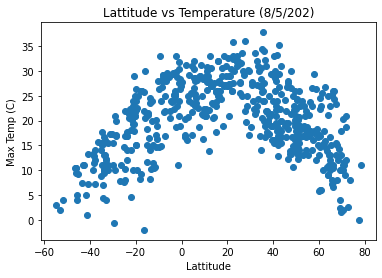

In [49]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp (C)'])
plt.title("Lattitude vs Temperature (8/5/202)")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (C)")
plt.savefig('Lat v Temp.png')

## Latitude vs. Humidity Plot

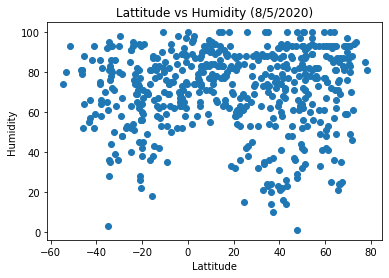

In [50]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title("Lattitude vs Humidity (8/5/2020)")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.savefig('Lat v Hum.png')

## Latitude vs. Cloudiness Plot

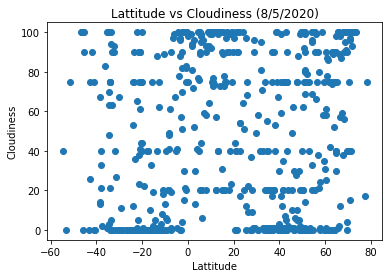

In [51]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.title("Lattitude vs Cloudiness (8/5/2020)")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.savefig('Lat v Clo.png')

## Latitude vs. Wind Speed Plot

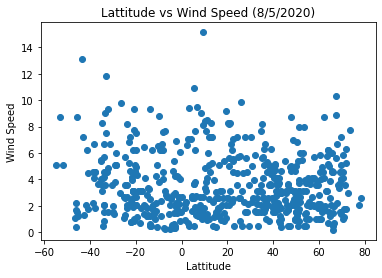

In [52]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title("Lattitude vs Wind Speed (8/5/2020)")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.savefig('Lat v WS.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[(weather_df['Lat'] >= 0) & (weather_df['Lng'] <= 90)]
southern_df = weather_df.loc[(weather_df['Lat'] >= -90) & (weather_df['Lng'] <= 0)]

City    Lat     Lng  Max Temp (C)  Humidity  Cloudiness  \
0          Arraial do Cabo -22.97  -42.03         20.56        74           0   
2    Los Llanos de Aridane  28.66  -17.92         23.00        73          90   
7               New London  41.36  -72.10         23.00        88           1   
9              Provideniya  64.38 -173.30         11.00        71          75   
14                  Atuona  -9.80 -139.03         26.30        76           6   
..                     ...    ...     ...           ...       ...         ...   
542                Baraboo  43.47  -89.74         15.56        93           1   
543             Carinhanha -14.30  -43.77         16.41        77           1   
544  Mayor Pablo Lagerenza -19.93  -60.77         22.36        38           0   
550          Santa Barbara  34.42 -119.70         17.00        88           1   
556                 Tiarei -17.53 -149.33         26.00        69          40   

     Wind Speed Country        Date  
0          6.85      BR  1596689996  
2          4.60      ES  1596689785  
7          3.10      US  1596690221  
9          5.00      RU  1596689634  
14         8.83      PF  1596690223  
..          ...     ...         ...  
542        1.85      US  1596690373  
543        3.27      BR  1596690373  
544        2.67      PY  1596690373  
550        3.10      US  1596690375  
556        3.10      PF  1596690377  

[237 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

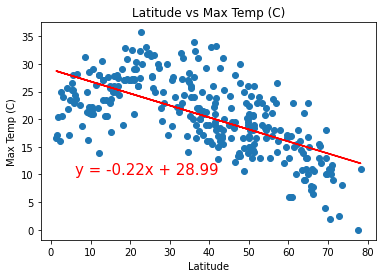

<Figure size 432x288 with 0 Axes>

In [54]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Max Temp (C)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
plt.savefig('Lat v norMaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

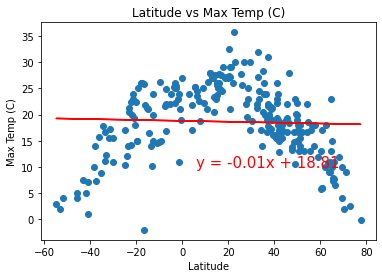

<Figure size 432x288 with 0 Axes>

In [55]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp (C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Max Temp (C)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
plt.savefig('Lat v souMaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

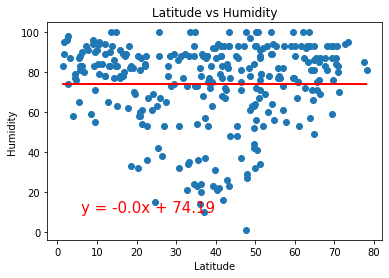

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Lat v norHum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

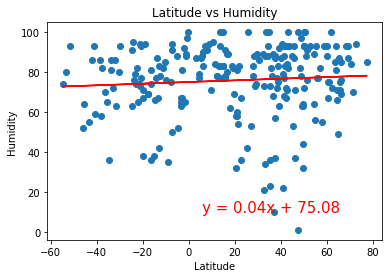

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Lat v souHum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

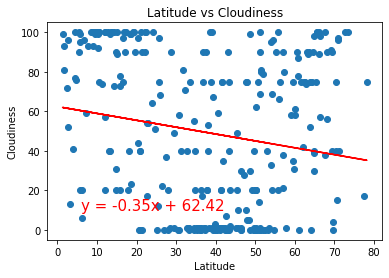

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Lat v norClo.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

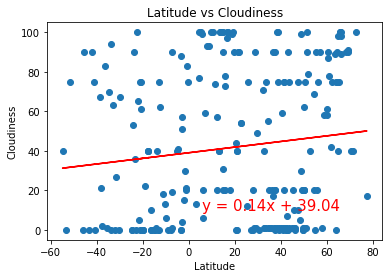

<Figure size 432x288 with 0 Axes>

In [59]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Lat v souClo.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

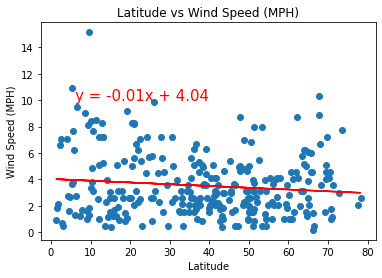

<Figure size 432x288 with 0 Axes>

In [60]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()
plt.savefig('Lat v norWS.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

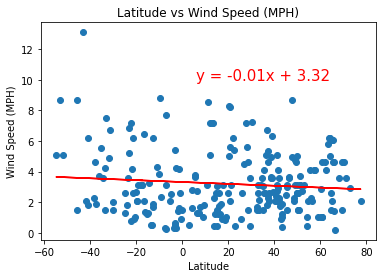

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()
plt.savefig('Lat v souWS.png')